**Problem 4.1** In this problem we will demonstrate the linear performance gain promised by relation (4.104) in code for Example 4.6. Formulate a model $w^o$ of your choice, and generate data according to the observation model (4.97), ensuring agents are homogenous by sampling $\boldsymbol{h}_k$ and $\boldsymbol{v}_k$ from identical distributions. Reasonable choices are $\boldsymbol{h}_k \sim \mathcal{N}(0, \sigma_{h}^2 I_M)$ and $\boldsymbol{v}_k \sim \mathcal{N}(0, \sigma_{v}^2)$. Implement recursions (4.100)–-(4.101) and plot the evolution of the error over time. Compare the performance for $K = 1$, $K = 10$ and $K = 100$ agents and verify whether you observe linear gains in performance.

**Solution.** We begin by importing some standard packages which will be useful throughout this exercise:



In [140]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)

We set values for the variances $\sigma_v^2$ and $\sigma_h^2$, as well as dimension $M$ and an array of network sizes $K$, called ''nr_agents''. Then we generate an arbitrary $w^o$ by sampling from a standard normal distribution. We also fix the total number of iterations to run.

In [141]:
sigma_h_squared = 1
sigma_v_squared = 0.01
sigma_w_squared = 1
iterations = 1000
experiments = 10
M = 2
K = 100
L = 100
E = 1

w_base = np.ones(M)

mu = 0.1



We now iterate over all network sizes, and implement recursions (4.100)--(4.101) for all iterations. Since we are solving an expected risk minimization problem via stochastic gradient-descent, we can generate data online for every agent as it is needed. All errors are stored in the ''error'' matrix.

In [142]:
error = np.zeros((iterations+1, experiments))

for experiment in range(experiments):
    w_ok = np.random.multivariate_normal(w_base, np.square(sigma_w_squared)*np.eye(M), K).T
    w_o = np.mean(w_ok, 1)

    w = np.zeros(M)
    error[0, experiment] = np.square(np.linalg.norm(w - w_o))
    for i in range(1, iterations+1):
        cal_L = np.random.permutation(K)
        cal_L = cal_L[range(L)]

        psi = np.zeros((M, K))
        for k in cal_L:
            psi[:, k] = w
            for e in range(E):
                h = np.random.multivariate_normal(np.zeros(M), sigma_h_squared*np.eye(M)).T
                v = np.random.normal(0, sigma_v_squared)
                gamma = np.dot(h, w_ok[:, k]) + v

                psi[:, k] = psi[:, k] + np.true_divide(mu, E) * h * (gamma - np.dot(h, psi[:, k]))
        w = np.mean(psi[:, cal_L], axis=1)
        error[i, experiment] = np.square(np.linalg.norm(w - w_o))

Finally, we plot the different learning curves in semilogarithmic scale.

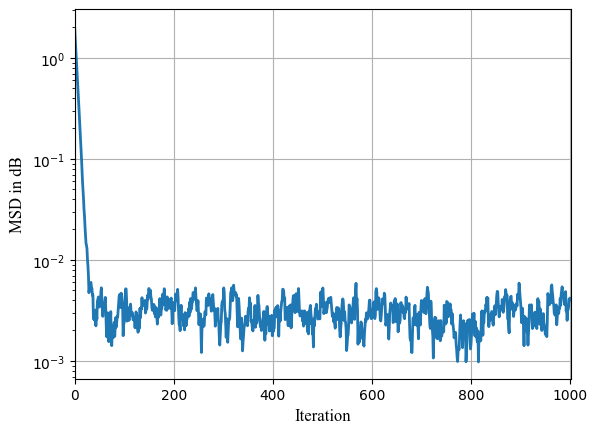

In [143]:
plt.figure()
plt.semilogy(range(iterations+1), np.mean(error, axis=1), linewidth=2)
plt.xlabel('Iteration',fontsize=12,fontname='times new roman' )
plt.ylabel('MSD in dB',fontsize= 12,fontname='times new roman' )
plt.xlim(0,iterations+1)
plt.grid()
plt.savefig('centralized_heterogeneous.eps', format='eps')
plt.show()